In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = "DejaVu Sans"

print("Библиотеки успешно импортированы")

Библиотеки успешно импортированы


In [9]:
try:
    file_path = "C:/Users/emmis/PycharmProjects/Project/data/ha_data.csv"
    df = pd.read_csv(file_path, sep=";")
    print ("Данные успешно загружены")
    print (f"Размер данных: {df.shape}")
    print(f"Колонки: {list(df.columns)}")
except Exception as e:
    print(f"Ошибка загрузки: {e}")

Данные успешно загружены
Размер данных: (8471226, 7)
Колонки: ['order_id', 'page_id', 'product', 'site_version', 'time', 'title', 'user']


In [10]:
data = df.copy()
data.columns = ['order_id', 'page_id', 'product', 'site_version', 'time', 'title','user']

data['time'] = pd.to_datetime(data['time'])
data['order_id'] = data['order_id'].fillna('no_order')
data['page_id'] = data['page_id'].fillna('no_page')
data['event_type'] = data['title'].str.split('_').str[-1]

print("Информация о данных: ")
print(data.info())
print("\n Первые 3 строки: ")
data.head(3)

Информация о данных: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471226 entries, 0 to 8471225
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   order_id      object        
 1   page_id       object        
 2   product       object        
 3   site_version  object        
 4   time          datetime64[ns]
 5   title         object        
 6   user          object        
 7   event_type    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 517.0+ MB
None

 Первые 3 строки: 


,order_id,page_id,product,site_version,time,title,user,event_type
0,no_order,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0,show
1,no_order,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0,show
2,no_order,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1,show


In [25]:
print("Основная Статистика:")
print(f"Всего событий: {len(data):,}")
print(f"Уникальных пользователей: {data['user'].nunique():,}")
print(f"Уникальных продуктов: {data['product'].nunique()}")
print(f"Период данных: от {data['time'].min()} до {data['time'].max()}")
print(f"Дней данных: {(data['time'].max() - data['time'].min()).days}")

print("\nРаспределение событий:")
event_counts = data['event_type'].value_counts()
print(event_counts)

print("\nРаспределение по платформам:")
print(data['site_version'].value_counts())

Основная Статистика:
Всего событий: 8,471,226
Уникальных пользователей: 4,254,621
Уникальных продуктов: 5
Период данных: от 2017-01-01 00:00:03 до 2017-05-31 23:59:58
Дней данных: 150

Распределение событий:
event_type
show     7393319
click     829185
order     248722
Name: count, dtype: int64

Распределение по платформам:
site_version
mobile     6088340
desktop    2382886
Name: count, dtype: int64


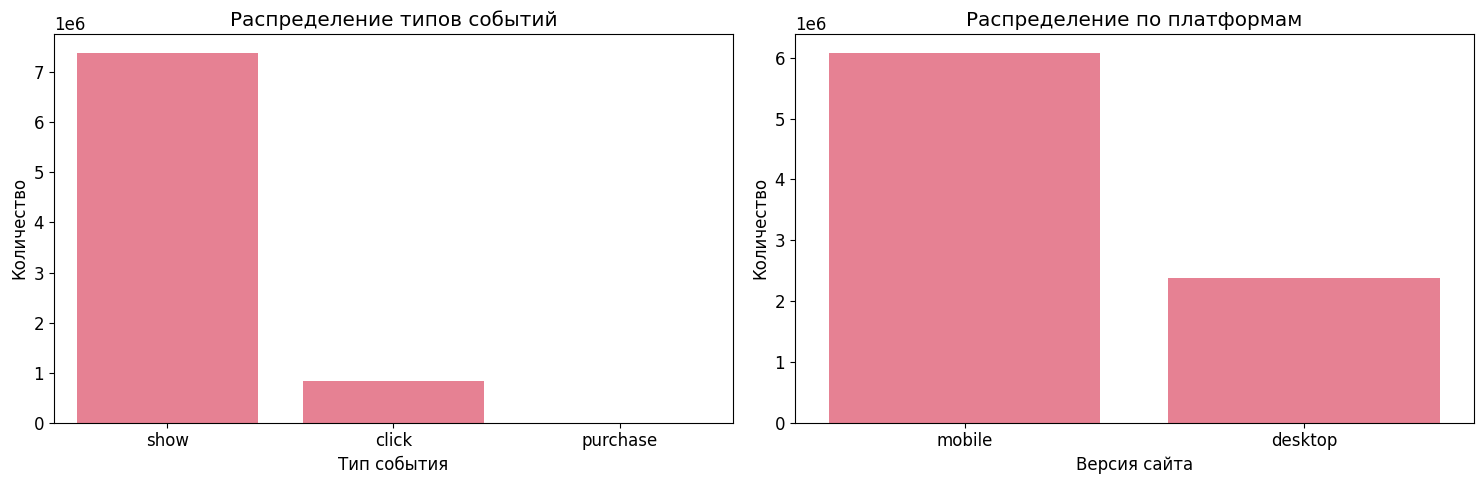

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=data, x='event_type', order=['show', 'click', 'purchase'], ax=axes[0])
axes[0].set_title('Распределение типов событий')
axes[0].set_xlabel('Тип события')
axes[0].set_ylabel('Количество')

sns.countplot(data=data, x='site_version', ax=axes[1])
axes[1].set_title('Распределение по платформам')
axes[1].set_xlabel('Версия сайта')
axes[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()

In [26]:
total_shows = data[data['event_type'] == 'show'].shape[0]
total_clicks = data[data['event_type'] == 'click'].shape[0]
total_purchases = data[data['event_type'] == 'order'].shape[0]

overall_ctr = round(total_clicks / total_shows * 100, 2) if total_shows > 0 else 0
overall_conversion = round(total_purchases / total_clicks * 100, 2) if total_clicks > 0 else 0

print("Метрики Эффективнсти")
print(f"Показы: {total_shows:,}")
print(f"Клики: {total_clicks:,}")
print(f"Покупки: {total_purchases:,}")
print(f"CTR: {overall_ctr}%")
print(f"Конверсия: {overall_conversion}%")

Метрики Эффективнсти
Показы: 7,393,319
Клики: 829,185
Покупки: 248,722
CTR: 11.22%
Конверсия: 30.0%


In [30]:
product_stats = data.groupby('product').agg({
    'event_type': [
        ('shows', lambda x: (x == 'show').sum()),
        ('clicks', lambda x: (x == 'click').sum()),
        ('purchases', lambda x: (x == 'order').sum())
    ]
}).round(2)

product_stats.columns = product_stats.columns.droplevel(0)
product_stats['CTR'] = (product_stats['clicks'] / product_stats['shows'] * 100).round(2)
product_stats['Conversion'] = (product_stats['purchases'] / product_stats['clicks'] * 100).round(2)

print("Эффективность по продуктам:")
product_stats

Эффективность по продуктам:


,shows,clicks,purchases,CTR,Conversion
product,,,,,
accessories,1440954,136254,44551,9.46,32.70
clothes,1453128,220595,112715,15.18,51.10
company,1580238,144821,0,9.16,0.00
sneakers,1453029,182597,67719,12.57,37.09
sports_nutrition,1465970,144918,23737,9.89,16.38


In [29]:
average_order_value = 5000

current_revenue = total_purchases * average_order_value
cpc_rate = 10
potential_revenue = int(total_clicks * cpc_rate)

print("Экономический Анализ:")
print(f"Текущий доход от баннеров: {current_revenue:,.0f} руб.")
print(f"Потенциальный доход от продажи (CPC {cpc_rate} руб.): {potential_revenue:,.0f} руб.")
print(f"Разница: {abs(current_revenue - potential_revenue):,.0f} руб.")

if potential_revenue > current_revenue:
    print("\nВывод: Продажа места под баннер выгоднее")
else:
    print("\nВывод: Текущее использование баннеров выгоднее")

Экономический Анализ:
Текущий доход от баннеров: 1,243,610,000 руб.
Потенциальный доход от продажи (CPC 10 руб.): 8,291,850 руб.
Разница: 1,235,318,150 руб.

Вывод: Текущее использование баннеров выгоднее


In [31]:
print("Финальные выводы и рекомендации")
print(f"\n1. Эффективность:")
print(f"   CTR: {overall_ctr}%")
print(f"   Конверсия: {overall_conversion}%")
print(f"   Показов/кликов/покупок: {total_shows:,}/{total_clicks:,}/{total_purchases:,}")

print(f"\n2. Экономика:")
print(f"   Текущая ценность: {current_revenue:,.0f} руб.")
print(f"   Потенциальная ценность: {potential_revenue:,.0f} руб.")

if potential_revenue > current_revenue:
    print(f"   Рекомендация: Продать место под баннер")
    print(f"   Обоснование: CPC модель принесет на {potential_revenue - current_revenue:,.0f} руб. больше")
else:
    print(f"   Рекомендация: Оставить текущую модель")
    print(f"   Обоснование: Текущие баннеры приносят на {current_revenue - potential_revenue:,.0f} руб. больше")

print(f"\n3. Рекомендации:")
print("   Оптимизировать баннеры для увеличения CTR")
print("   Проанализировать наиболее эффективные продукты")
print("   Рассмотреть гибридную модель")
print("   Провести A/B тестирование разных баннеров")

Финальные выводы и рекомендации

1. Эффективность:
   CTR: 11.22%
   Конверсия: 30.0%
   Показов/кликов/покупок: 7,393,319/829,185/248,722

2. Экономика:
   Текущая ценность: 1,243,610,000 руб.
   Потенциальная ценность: 8,291,850 руб.
   Рекомендация: Оставить текущую модель
   Обоснование: Текущие баннеры приносят на 1,235,318,150 руб. больше

3. Рекомендации:
   Оптимизировать баннеры для увеличения CTR
   Проанализировать наиболее эффективные продукты
   Рассмотреть гибридную модель
   Провести A/B тестирование разных баннеров
